# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [5]:
features = data[data.columns[0:10]]
features.sample(10)

,A,B,C
95,1.178199,1.738500,1.631366
557,2.082126,1.441353,1.652145
273,0.545893,0.791868,0.527903
777,-0.853236,-1.333506,-0.449960
787,3.397408,2.176571,3.633421
3,3.217913,2.213772,4.260312
248,0.078926,1.190647,-0.369051
850,1.712149,2.354219,1.571737
835,-0.003862,1.142931,0.651157
571,2.468575,2.102066,1.450785


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# normalize the feature
scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])

# get two principal components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       [-0.46052216,  0.11460533],
       [ 0.44134723, -0.16034683],
       [ 0.42096717, -0.06126763],
       [-0.57863184,  0.07164111],
       [-0.14035181,  0.10637315],
       [ 0.47575131,  0.13633551],
       [ 0.57024335,  0.0206122 ]])

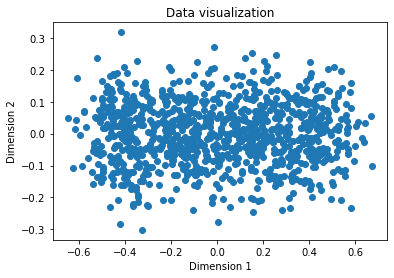

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data visualization')
plt.show()

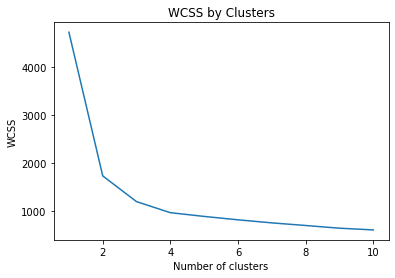

In [9]:
import numpy as np
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features.values)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Use k-means algorithm

In [10]:
from sklearn.cluster import KMeans

# create model with 4 centroids
model = KMeans(n_clusters=4, init='k-means++', n_init=500, max_iter=1500)
# fit the model and prediction for each point of data
km_clusters = model.fit_predict(data)
km_clusters

array([1, 1, 3, 3, 1, 1, 3, 2, 1, 1, 3, 0, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2,
       1, 1, 2, 0, 3, 1, 0, 2, 0, 1, 3, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 0,
       3, 1, 1, 3, 3, 2, 1, 0, 3, 3, 3, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2,
       0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 2, 2, 1, 0, 2, 0, 3, 0, 2, 3, 0, 2,
       2, 0, 0, 0, 3, 2, 0, 2, 3, 2, 3, 0, 2, 0, 3, 0, 2, 0, 3, 2, 2, 3,
       2, 0, 1, 1, 0, 3, 0, 3, 1, 0, 2, 0, 3, 3, 1, 2, 0, 2, 3, 1, 0, 0,
       0, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 3, 3, 2, 3, 2, 2, 3, 1, 1, 2,
       1, 0, 1, 2, 2, 2, 0, 1, 3, 3, 2, 0, 0, 1, 1, 3, 1, 0, 2, 3, 2, 0,
       0, 2, 2, 1, 2, 1, 0, 0, 2, 3, 1, 3, 3, 0, 0, 1, 0, 2, 3, 0, 2, 2,
       1, 3, 0, 3, 3, 3, 1, 1, 3, 2, 3, 1, 3, 3, 0, 1, 3, 2, 2, 3, 1, 3,
       2, 1, 0, 3, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 1, 3, 3, 1, 3, 0, 3, 0,
       3, 2, 2, 0, 3, 1, 1, 2, 3, 2, 0, 0, 3, 3, 3, 1, 3, 1, 2, 3, 3, 2,
       1, 2, 0, 0, 0, 2, 3, 1, 2, 0, 1, 0, 3, 2, 2, 1, 3, 3, 0, 1, 1, 3,
       3, 0, 3, 1, 1, 0, 1, 3, 3, 3, 2, 2, 0, 1, 3,

Plot the clusters


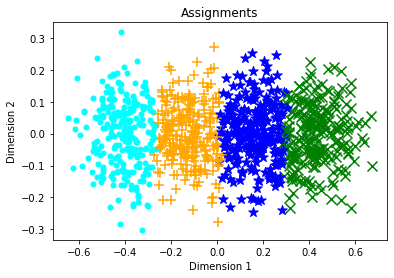

In [11]:
def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange', 3:'cyan'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features_2d, km_clusters)